In [3]:
import pandas as pd
import pycountry
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [6]:
DATA_FOLDER = 'F:\\9_COURS_EPFL_MA1\\4_ADA\\ada-2024-project-bada55\\data\\'
BEER_ADVOCATE_FOLDER = DATA_FOLDER + 'BeerAdvocate/' #BA
RATE_BEER_FOLDER = DATA_FOLDER + 'RateBeer/' #RB
MATCHED_BEER = DATA_FOLDER + 'matched_beer_data/' #MB

BA_BEERS_DATASET = BEER_ADVOCATE_FOLDER + "beers.csv"
BA_BREWERIES_DATASET = BEER_ADVOCATE_FOLDER + "breweries.csv"
BA_USERS_DATASET = BEER_ADVOCATE_FOLDER + "users.csv"
BA_RATINGS_DATASET = BEER_ADVOCATE_FOLDER + "ratings.txt"
BA_REVIEWS_DATASET = BEER_ADVOCATE_FOLDER + "reviews.txt"

RB_BEERS_DATASET = RATE_BEER_FOLDER + "beers.csv"
RB_BREWERIES_DATASET = RATE_BEER_FOLDER + "breweries.csv"
RB_USERS_DATASET = RATE_BEER_FOLDER + "users.csv"
RB_RATINGS_DATASET = RATE_BEER_FOLDER + "ratings.txt"
RB_REVIEWS_DATASET = RATE_BEER_FOLDER + "ratings.txt"

df_beers = pd.read_csv(BA_BEERS_DATASET)
df_breweries = pd.read_csv(BA_BREWERIES_DATASET)
df_users = pd.read_csv(BA_USERS_DATASET)

# Preprocess Breweries

In [7]:
def name_to_country(name : str) -> str:
    if len(name) >= 13:
        if name.split("<")[0] in ["United States", "Utah", "New York", "Illinois"]:
            return "United States"
        if name.split(",")[0] in ["United States"]:
            return "United States"
    return name

In [8]:
country_continent_map = {
    'Kyrgyzstan': 'Asia', 'Gabon': 'Africa', 'Northern Ireland': 'Europe',
    'Wales': 'Europe', 'Scotland': 'Europe', 'England': 'Europe',
    'Singapore': 'Asia', 'China': 'Asia', 'Chad': 'Africa', 
    'Saint Lucia': 'North America', 'Cameroon': 'Africa',
    'Burkina Faso': 'Africa', 'Zambia': 'Africa', 'Romania': 'Europe',
    'Nigeria': 'Africa', 'South Korea': 'Asia', 'Georgia': 'Asia',
    'Hong Kong': 'Asia', 'Guinea': 'Africa', 'Montenegro': 'Europe',
    'Benin': 'Africa', 'Mexico': 'North America', 'Fiji Islands': 'Oceania',
    'Guam': 'Oceania', 'Laos': 'Asia', 'Senegal': 'Africa',
    'Honduras': 'North America', 'Morocco': 'Africa', 'Indonesia': 'Asia',
    'Monaco': 'Europe', 'Ukraine': 'Europe', 'Canada': 'North America',
    'Jordan': 'Asia', 'Portugal': 'Europe', 'Guernsey': 'Europe',
    'India': 'Asia', 'Puerto Rico': 'North America', 'Japan': 'Asia',
    'Iran': 'Asia', 'Hungary': 'Europe', 'Bulgaria': 'Europe',
    'Guinea-Bissau': 'Africa', 'Liberia': 'Africa', 'Togo': 'Africa',
    'Niger': 'Africa', 'Croatia': 'Europe', 'Lithuania': 'Europe',
    'Cyprus': 'Asia', 'Italy': 'Europe', 'Andorra': 'Europe',
    'Botswana': 'Africa', 'Turks and Caicos Islands': 'North America',
    'Papua New Guinea': 'Oceania', 'Mongolia': 'Asia', 'Ethiopia': 'Africa',
    'Denmark': 'Europe', 'French Polynesia': 'Oceania', 'Greece': 'Europe',
    'Sri Lanka': 'Asia', 'Syria': 'Asia', 'Germany': 'Europe', 'Jersey': 'Europe',
    'Armenia': 'Asia', 'Mozambique': 'Africa', 'Palestine': 'Asia',
    'Bangladesh': 'Asia', 'Turkmenistan': 'Asia', 'Reunion': 'Africa',
    'Eritrea': 'Africa', 'Switzerland': 'Europe', 'Malta': 'Europe',
    'Israel': 'Asia', 'El Salvador': 'North America', 'French Guiana': 'South America',
    'Tonga': 'Oceania', 'Zimbabwe': 'Africa', 'Samoa': 'Oceania', 'Barbados': 'North America',
    'Chile': 'South America', 'Cambodia': 'Asia', 'Cook Islands': 'Oceania',
    'Trinidad & Tobago': 'North America', 'Bhutan': 'Asia', 'Uzbekistan': 'Asia',
    'Egypt': 'Africa', 'Uruguay': 'South America', 'Dominican Republic': 'North America',
    'Equatorial Guinea': 'Africa', 'Russia': 'Europe', 'Tajikistan': 'Asia',
    'Vietnam': 'Asia', 'Palau': 'Oceania', 'Namibia': 'Africa',
    'Cayman Islands': 'North America', 'Sao Tome and Principe': 'Africa', 'Australia': 'Oceania',
    'Martinique': 'North America', 'Virgin Islands (British)': 'North America',
    'Ecuador': 'South America', 'Vanuatu': 'Oceania', 'Congo': 'Africa',
    'Uganda': 'Africa', 'Mauritius': 'Africa', 'Azerbaijan': 'Asia',
    'Argentina': 'South America', 'Tunisia': 'Africa', 'Belize': 'North America',
    'Luxembourg': 'Europe', 'Madagascar': 'Africa', 'Aruba': 'North America',
    'Spain': 'Europe', 'Swaziland': 'Africa', 'South Sudan': 'Africa',
    'Belarus': 'Europe', 'Ivory Coast': 'Africa', 'Austria': 'Europe',
    'Bolivia': 'South America', 'Central African Republic': 'Africa',
    'Mali': 'Africa', 'Suriname': 'South America', 'Solomon Islands': 'Oceania',
    'Rwanda': 'Africa', 'Brazil': 'South America', 'Gibraltar': 'Europe',
    'Taiwan': 'Asia', 'Turkey': 'Asia', 'Greenland': 'North America',
    'Moldova': 'Europe', 'Haiti': 'North America', 'Guadeloupe': 'North America',
    'South Africa': 'Africa', 'Lesotho': 'Africa', 'Czech Republic': 'Europe',
    'Micronesia': 'Oceania', 'Paraguay': 'South America', 'Iraq': 'Asia',
    'Faroe Islands': 'Europe', 'Panama': 'North America', 'Netherlands': 'Europe',
    'Peru': 'South America', 'New Zealand': 'Oceania', 'Ghana': 'Africa',
    'Slovenia': 'Europe', 'Serbia': 'Europe', 'Macedonia': 'Europe',
    'Latvia': 'Europe', 'Guatemala': 'North America', 'Cuba': 'North America',
    'Venezuela': 'South America', 'Angola': 'Africa', 'Finland': 'Europe',
    'Nicaragua': 'North America', 'Sweden': 'Europe', 'Seychelles': 'Africa',
    'Poland': 'Europe', 'Cape Verde Islands': 'Africa', 'Libya': 'Africa',
    'Isle of Man': 'Europe', 'Ireland': 'Europe', 'Myanmar': 'Asia',
    'Algeria': 'Africa', 'Kazakhstan': 'Asia', 'Norway': 'Europe',
    'United States': 'North America', 'Costa Rica': 'North America',
    'North Korea': 'Asia', 'Bosnia and Herzegovina': 'Europe', 'Jamaica': 'North America',
    'Lebanon': 'Asia', 'Dominica': 'North America', 'Virgin Islands (U.S.)': 'North America',
    'Colombia': 'South America', 'Iceland': 'Europe', 'Macau': 'Asia',
    'Grenada': 'North America', 'Malaysia': 'Asia', 'Belgium': 'Europe',
    'Saint Vincent and The Grenadines': 'North America', 'Bahamas': 'North America',
    'Philippines': 'Asia', 'Curaçao': 'North America', 'San Marino': 'Europe',
    'France': 'Europe', 'Bermuda': 'North America', 'Mayotte': 'Africa',
    'Antigua & Barbuda': 'North America', 'Estonia': 'Europe', 'Gambia': 'Africa',
    'Pakistan': 'Asia', 'New Caledonia': 'Oceania', 'Slovak Republic': 'Europe',
    'Liechtenstein': 'Europe', 'Tanzania': 'Africa', 'Malawi': 'Africa',
    'Nepal': 'Asia', 'United Arab Emirates': 'Asia', 'Kenya': 'Africa',
    'Thailand': 'Asia', 'Albania': 'Europe', 'Canada, Ontario': 'North America',
    'United Kingdom, England': 'Europe', 'Canada, Manitoba': 'North America',
    'Canada, Nova Scotia': 'North America', 'Canada, Quebec': 'North America',
    'Canada, Newfoundland and Labrador': 'North America', 'Canada, Alberta': 'North America',
    'Canada, British Columbia': 'North America', 'Canada, Saskatchewan': 'North America',
    'UNKNOWN': 'Unknown', 'Canada, New Brunswick': 'North America',
    'United Kingdom, Wales': 'Europe', 'United Kingdom, Scotland': 'Europe'
}


In [9]:
style_to_type = {
    # Lager
    'Euro Pale Lager': 'Lager', 'German Pilsener': 'Lager', 'Munich Helles Lager': 'Lager', 
    'Czech Pilsener': 'Lager', 'American Pale Lager': 'Lager', 'Light Lager': 'Lager',
    'Vienna Lager': 'Lager', 'Dortmunder / Export Lager': 'Lager', 'Euro Dark Lager': 'Lager',
    'Munich Dunkel Lager': 'Lager', 'Kellerbier / Zwickelbier': 'Lager', 'Japanese Rice Lager': 'Lager',
    'American Amber / Red Lager': 'Lager', 'Euro Strong Lager': 'Lager', 'American Adjunct Lager': 'Lager',
    
    # Ale
    'English Pale Ale': 'Ale', 'English Bitter': 'Ale', 'American Pale Ale (APA)': 'Ale', 
    'Irish Red Ale': 'Ale', 'American Blonde Ale': 'Ale', 'American Amber / Red Ale': 'Ale',
    'English Brown Ale': 'Ale', 'Saison / Farmhouse Ale': 'Ale', 'American Black Ale': 'Ale', 
    'Altbier': 'Ale', 'Extra Special / Strong Bitter (ESB)': 'Ale', 'Belgian Pale Ale': 'Ale',
    'American Wild Ale': 'Ale', 'Winter Warmer': 'Ale', 'English Strong Ale': 'Ale', 'Old Ale': 'Ale',
    'Scottish Ale': 'Ale', 'Scottish Gruit / Ancient Herbed Ale': 'Ale', 'Flanders Red Ale': 'Ale',
    'American Strong Ale': 'Ale', 'Braggot': 'Ale', 'American Barleywine': 'Ale', 
    'English Barleywine': 'Ale', 'Flanders Oud Bruin': 'Ale', 'American Dark Wheat Ale': 'Ale',
    
    # Stout
    'American Stout': 'Stout', 'Milk / Sweet Stout': 'Stout', 'Irish Dry Stout': 'Stout',
    'Foreign / Export Stout': 'Stout', 'Oatmeal Stout': 'Stout', 'Russian Imperial Stout': 'Stout', 
    'English Stout': 'Stout', 'American Double / Imperial Stout': 'Stout',
    
    # Pilsner
    'American Double / Imperial Pilsner': 'Pilsner', 'German Pilsener': 'Pilsner', 'Czech Pilsener': 'Pilsner',
    
    # Wheat Beer
    'American Pale Wheat Ale': 'Wheat Beer', 'Berliner Weissbier': 'Wheat Beer', 'Hefeweizen': 'Wheat Beer',
    'Dunkelweizen': 'Wheat Beer', 'Kristalweizen': 'Wheat Beer', 'Weizenbock': 'Wheat Beer',
    'Witbier': 'Wheat Beer',

    # Belgian Styles (often considered Ales but could be a distinct category)
    'Tripel': 'Ale', 'Dubbel': 'Ale', 'Quadrupel (Quad)': 'Ale', 'Belgian Strong Dark Ale': 'Ale',
    'Belgian Dark Ale': 'Ale', 'Belgian Strong Pale Ale': 'Ale', 'Belgian IPA': 'Ale',

    # Other
    'Bière de Garde': 'Other', 'Kvass': 'Other', 'Lambic - Fruit': 'Other', 'Lambic - Unblended': 'Other',
    'Gueuze': 'Other', 'Bière de Champagne / Bière Brut': 'Other', 'Gose': 'Other', 'Faro': 'Other',
    'Pumpkin Ale': 'Other', 'Sahti': 'Other', 'Eisbock': 'Other', 'Rauchbier': 'Other', 
    'Maibock / Helles Bock': 'Other', 'Bock': 'Other', 'Doppelbock': 'Other', 'Cream Ale': 'Other', 
    'California Common / Steam Beer': 'Other', 'Schwarzbier': 'Other', 'Smoked Beer': 'Other', 
    'Fruit / Vegetable Beer': 'Other', 'Herbed / Spiced Beer': 'Other', 'Rye Beer': 'Other', 
    'English Pale Mild Ale': 'Other', 'Black & Tan': 'Other', 'Chile Beer': 'Other', 
    'American Malt Liquor': 'Other', 'Low Alcohol Beer': 'Other', 'Wheatwine': 'Other'
}


In [10]:
new_df_breweries = df_breweries.copy()
new_df_breweries["country"] = new_df_breweries["location"].apply(lambda name : name_to_country(name))
new_df_breweries["continent"] = new_df_breweries["country"].apply(lambda country : country_continent_map.get(country, "Unknown"))

# Preprocess beers

In [11]:
new_df_breweries.columns

Index(['id', 'location', 'name', 'nbr_beers', 'country', 'continent'], dtype='object')

In [12]:
dict_id_br_cont = dict(zip(new_df_breweries["id"], new_df_breweries["continent"]))

In [13]:
new_df_beers = df_beers.copy()
new_df_beers["continent"] = new_df_beers["brewery_id"].apply(lambda id_: dict_id_br_cont.get(id_))

In [14]:
new_df_beers["type"] = new_df_beers["style"].apply(style_to_type.get)

# Preprocess ratings

In [16]:
columns = ['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date', 
           'user_name', 'user_id','appearance', 'aroma', 'palate', 'taste', 'overall', 
           'rating', 'text', 'review']

data = []
current_entry = {}

max_entries = 100_000 #nb of treated lines in txt
entry_count = 0

with open("../data/BeerAdvocate/ratings.txt", 'r', encoding='utf-8') as file:
    #preview = file.read(100)
    #print(preview)

    for line in file:
        line = line.strip()  # Supprimer les espaces de début/fin
        if line:  # Si la ligne n'est pas vide
            if ':' in line:
                key, value = line.split(':', 1)  # Séparer la clé et la valeur
                key = key.strip()
                value = value.strip()
                current_entry[key] = value
        else:
            if current_entry:  # Si un bloc est terminé, ajouter l'entrée au dataset
                data.append(current_entry)
                current_entry = {}  # Réinitialiser pour le prochain bloc
                entry_count += 1
                if entry_count >= max_entries:  # Arrêter après 40 entrées
                    break
# Ajouter la dernière entrée si nécessaire et si le fichier ne finit pas par une ligne vide
if current_entry and entry_count < max_entries:
    data.append(current_entry)

ba_ratings = pd.DataFrame(data, columns=columns)
ba_ratings["date"] = pd.to_numeric(ba_ratings["date"])
ba_ratings["date"] = pd.to_datetime(ba_ratings["date"], unit='s').dt.strftime('%d/%m/%Y')
cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
ba_ratings[cols] = ba_ratings[cols].apply(pd.to_numeric, errors = 'coerce')

In [17]:
ba_ratings["continent"] = ba_ratings["brewery_id"].apply(lambda id_: dict_id_br_cont.get(int(id_)))
ba_ratings["type"] = ba_ratings["style"].apply(style_to_type.get)

# Save the new DataFrame

In [18]:
# new_df_breweries.to_csv("../generated/data/new_breweries.csv")
ba_ratings.to_csv("../generated/data/new_ratings.csv")
new_df_beers.to_csv("../generated/data/new_beers.csv")

In [19]:
new_df_beers['avg_computed'].value_counts()

avg_computed
4.000000    6483
3.750000    5720
3.500000    5135
4.250000    2265
3.000000    2141
            ... 
3.723765       1
3.649545       1
4.048780       1
4.000939       1
3.485200       1
Name: count, Length: 47941, dtype: int64

In [20]:
df_users = pd.read_csv("../data/BeerAdvocate/users.csv")

In [21]:
df_users

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


In [22]:
new_df_users = df_users.copy()
new_df_users["location"] = new_df_users["location"].astype(str)
new_df_users["country"] = new_df_users["location"].apply(lambda name : name_to_country(name))
new_df_users["continent"] = new_df_users["country"].apply(lambda country : country_continent_map.get(country, "Unknown"))

In [26]:
new_df_users.sample(3)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,country,continent
37570,96,1,woggydoggy.857996,woggydoggy,1.409825e+09,nan,nan,Unknown
23218,21,6,12ouncecurls.1494,12ouncecurls,1.044356e+09,"United States, Texas",United States,North America
32087,140,0,augie.197226,augie,NaN,nan,nan,Unknown


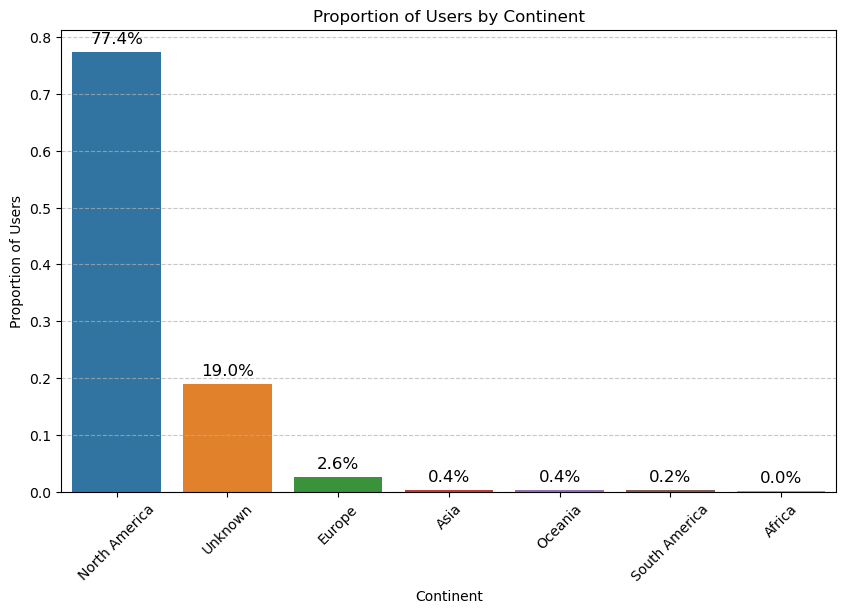

In [52]:
user_counts_by_continent = new_df_users['continent'].value_counts()
total_users = new_df_users['continent'].count()
proportion_by_continent = user_counts_by_continent / total_users

proportion_df = proportion_by_continent.reset_index()
proportion_df.columns = ['Continent', 'Proportion']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=proportion_df, x='Continent', y='Proportion', palette="tab10", hue="Continent")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.01, f'{height * 100:.1f}%', 
            ha='center', va='bottom', color='black', fontsize=12)
plt.title("Proportion of Users by Continent")
plt.xlabel("Continent")
plt.ylabel("Proportion of Users")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

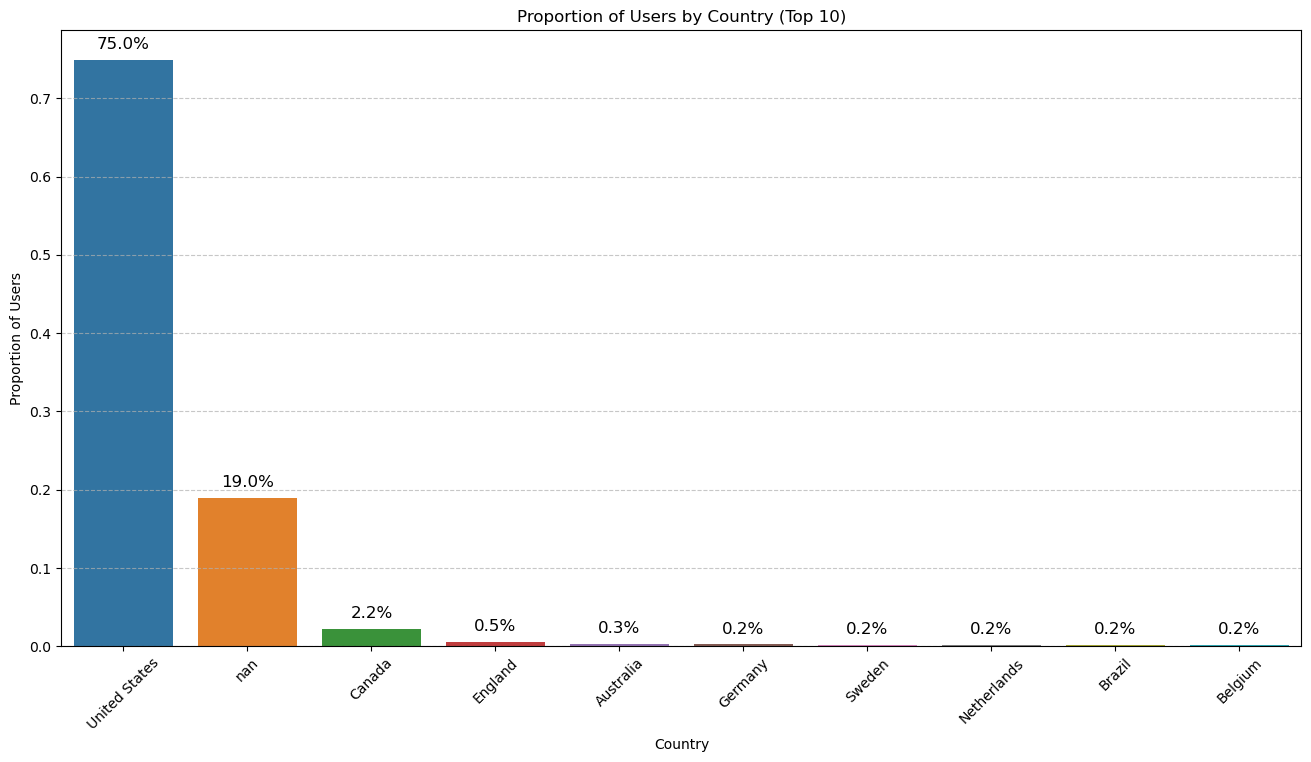

In [57]:
user_counts_by_country = new_df_users['country'].value_counts()
total_users = new_df_users['country'].count()
proportion_by_country = user_counts_by_country / total_users

proportion_country_df = proportion_by_country.reset_index()
proportion_country_df.columns = ['Country', 'Proportion']
top_10_countries = proportion_country_df.head(10)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_10_countries, x='Country', y='Proportion', hue='Country', palette="tab10")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.01, f'{height * 100:.1f}%', 
            ha='center', va='bottom', color='black', fontsize=12)
plt.title("Proportion of Users by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Proportion of Users")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

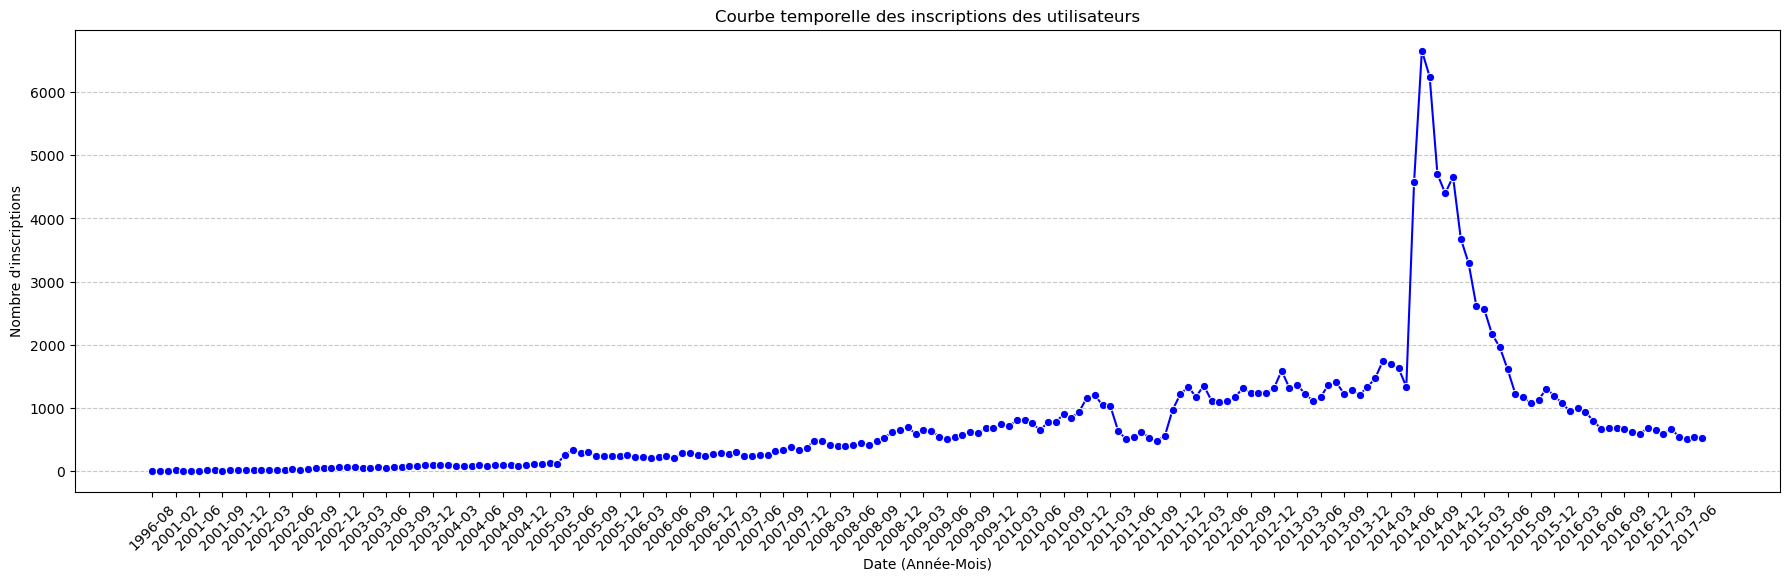

In [43]:
new_df_users['joined'] = pd.to_datetime(new_df_users['joined'], unit='s', errors='coerce')
new_df_users = new_df_users.dropna(subset=['joined']) 

new_df_users['year_month'] = new_df_users['joined'].dt.to_period('M')
monthly_signups = new_df_users['year_month'].value_counts().sort_index()

plt.figure(figsize=(22, 6))
sns.lineplot(x=monthly_signups.index.astype(str), y=monthly_signups.values, marker='o', color="b")
plt.title("Courbe temporelle des inscriptions des utilisateurs")
plt.xlabel("Date (Année-Mois)")
plt.ylabel("Nombre d'inscriptions")
plt.xticks(ticks=range(0, len(monthly_signups.index), 3), labels=monthly_signups.index[::3].astype(str), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

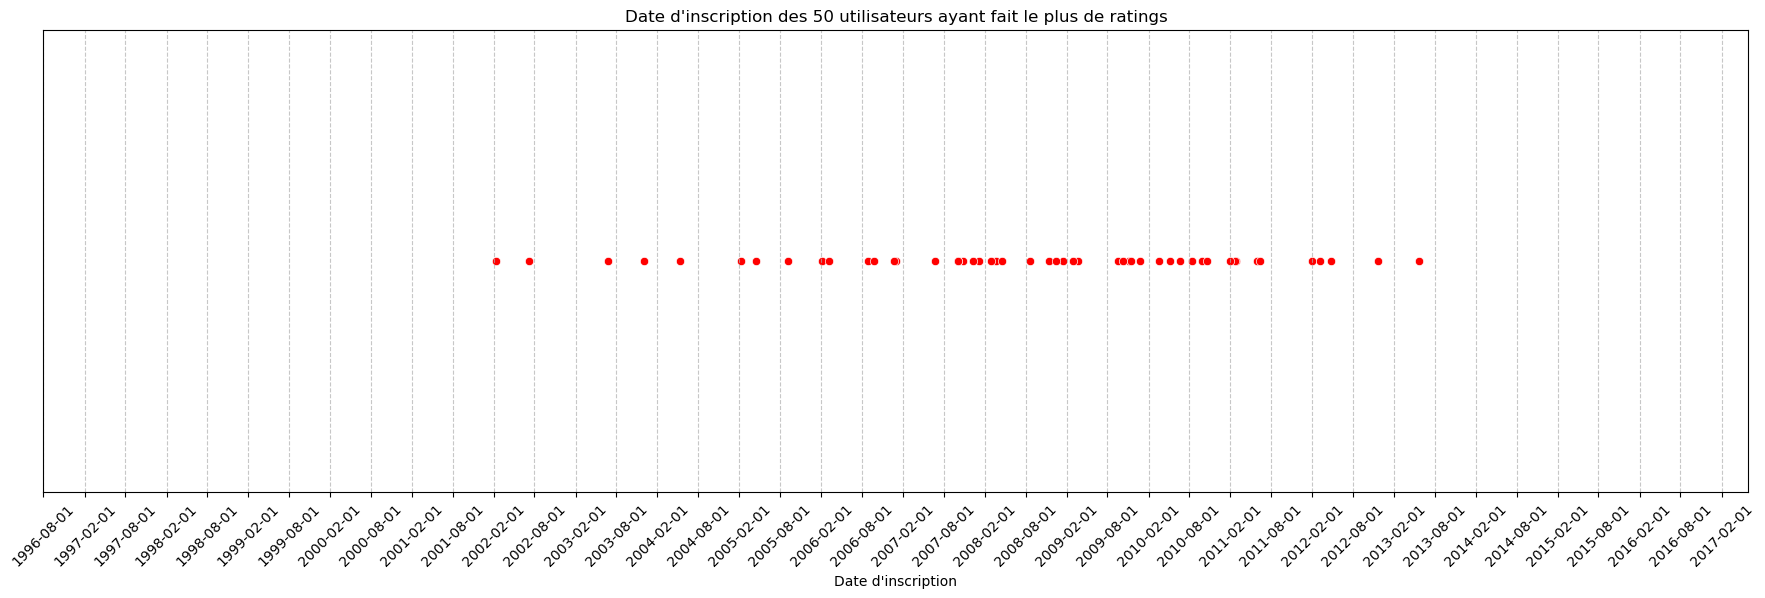

In [51]:
new_df_users['joined'] = pd.to_datetime(new_df_users['joined'], unit='s', errors='coerce')
new_df_users = new_df_users.dropna(subset=['joined'])

top_50_users = new_df_users.nlargest(50, 'nbr_ratings')
top_50_users_dates = top_50_users[['user_id', 'joined']]

plt.figure(figsize=(22, 6))
sns.scatterplot(data=top_50_users_dates, x='joined', y=[1]*len(top_50_users_dates), marker='o', color="red")
plt.title("Date d'inscription des 50 utilisateurs ayant fait le plus de ratings")
plt.xlabel("Date d'inscription")
plt.yticks([]) 
plt.xlim(pd.to_datetime('1996-08-01'), pd.to_datetime('2017-06-01'))
plt.xticks(
    pd.date_range('1996-08-01', '2017-06-01', freq='6MS'),  # Chaque 6 mois (mois/année)
    rotation=45
)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()